In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd '/content/drive/MyDrive/5018Project_MCTACO/' 

/content/drive/MyDrive/5018Project_MCTACO


In [3]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [4]:
colnames = ['context','question','candi','label','type']
df = pd.read_csv('./data/MCTACO/test_9442.tsv', sep='\t', header=None, names=colnames)
df

context  \
0     Durer's father died in 1502, and his mother di...   
1     Durer's father died in 1502, and his mother di...   
2     Durer's father died in 1502, and his mother di...   
3     Durer's father died in 1502, and his mother di...   
4     Durer's father died in 1502, and his mother di...   
...                                                 ...   
9437  Concerning the Georgetown Hoya interview where...   
9438  Concerning the Georgetown Hoya interview where...   
9439  Concerning the Georgetown Hoya interview where...   
9440  Concerning the Georgetown Hoya interview where...   
9441  Concerning the Georgetown Hoya interview where...   

                                   question                            candi  \
0              How long was his mother ill?       she was ill for 30 seconds   
1              How long was his mother ill?                    six centuries   
2              How long was his mother ill?         she was ill for 90 years   
3              How long was his mother ill?                         6 months   
4              How long was his mother ill?                      six minutes   
...                                     ...                              ...   
9437       How long did the interview last?                          1 hours   
9438       How long did the interview last?                           1 hour   
9439       How long did the interview last?  the interview lasted four weeks   
9440       How long did the interview last?                          2 hours   
9441  Is Kayla Rolland's case still active?                               no   

     label            type  
0       no  Event Duration  
1       no  Event Duration  
2       no  Event Duration  
3      yes  Event Duration  
4       no  Event Duration  
...    ...             ...  
9437   yes  Event Duration  
9438   yes  Event Duration  
9439    no  Event Duration  
9440   yes  Event Duration  
9441   yes    Stationarity  

[9442 rows x 5 columns]

In [5]:
d_df = pd.read_csv('/content/drive/MyDrive/5018Project_MCTACO/result/deberta-v3-large_best_frompretrained_True.txt', header=None, names=['deberta'])
r_df = pd.read_csv('/content/drive/MyDrive/5018Project_MCTACO/result/roberta-large_best_frompretrained_True.txt', header=None, names=['roberta'])
b_df = pd.read_csv('/content/drive/MyDrive/5018Project_MCTACO/result/bert-base-uncased_best_frompretrained_True.txt', header=None, names=['bert'])

In [6]:
df['deberta'] = d_df
df['roberta'] = r_df
df['bert'] = b_df
df

context  \
0     Durer's father died in 1502, and his mother di...   
1     Durer's father died in 1502, and his mother di...   
2     Durer's father died in 1502, and his mother di...   
3     Durer's father died in 1502, and his mother di...   
4     Durer's father died in 1502, and his mother di...   
...                                                 ...   
9437  Concerning the Georgetown Hoya interview where...   
9438  Concerning the Georgetown Hoya interview where...   
9439  Concerning the Georgetown Hoya interview where...   
9440  Concerning the Georgetown Hoya interview where...   
9441  Concerning the Georgetown Hoya interview where...   

                                   question                            candi  \
0              How long was his mother ill?       she was ill for 30 seconds   
1              How long was his mother ill?                    six centuries   
2              How long was his mother ill?         she was ill for 90 years   
3              How long was his mother ill?                         6 months   
4              How long was his mother ill?                      six minutes   
...                                     ...                              ...   
9437       How long did the interview last?                          1 hours   
9438       How long did the interview last?                           1 hour   
9439       How long did the interview last?  the interview lasted four weeks   
9440       How long did the interview last?                          2 hours   
9441  Is Kayla Rolland's case still active?                               no   

     label            type deberta roberta bert  
0       no  Event Duration      no      no   no  
1       no  Event Duration      no      no   no  
2       no  Event Duration      no      no   no  
3      yes  Event Duration     yes     yes  yes  
4       no  Event Duration      no      no   no  
...    ...             ...     ...     ...  ...  
9437   yes  Event Duration     yes     yes   no  
9438   yes  Event Duration     yes     yes   no  
9439    no  Event Duration      no      no  yes  
9440   yes  Event Duration     yes     yes   no  
9441   yes    Stationarity     yes     yes  yes  

[9442 rows x 8 columns]

In [19]:
df.to_csv('AllquestionsandResult.csv')

# Yes or No

In [10]:
df.groupby(['roberta']).size()

roberta
no     5828
yes    3614
dtype: int64

In [8]:
df.groupby(['label']).size()

label
no     6244
yes    3198
dtype: int64

In [9]:
df.groupby(['deberta']).size()

deberta
no     6057
yes    3385
dtype: int64

In [11]:
df.groupby(['bert']).size()

bert
no     5249
yes    4193
dtype: int64

# Case Study

In [14]:
cond = (df['label'] != df['roberta']) & (df['label'] != df['deberta']) & (df['label'] != df['bert'])
df[cond].to_csv('./result/HardQuestions.csv')

In [16]:
cond = (df['label'] != df['roberta']) & (df['label'] == df['deberta']) & (df['label'] != df['bert'])
df[cond].to_csv('./result/HardQuestionsButDebertaWin.csv')
df[cond]

context  \
64    So from now on, Marsha takes extra special car...   
69    So from now on, Marsha takes extra special car...   
93    He spoke the last word with such heavy intonat...   
99    These small, dark Melanesians are related in t...   
100   These small, dark Melanesians are related in t...   
...                                                 ...   
9411  Concerning the Georgetown Hoya interview where...   
9414  Concerning the Georgetown Hoya interview where...   
9415  Concerning the Georgetown Hoya interview where...   
9419  Concerning the Georgetown Hoya interview where...   
9421  Concerning the Georgetown Hoya interview where...   

                                               question  \
64                   How often was Joey safe and sound?   
69                   How often was Joey safe and sound?   
93           What did Arthur do after talking to Allan?   
99    Will they be related to Australian aborigines ...   
100   Will they be related to Australian aborigines ...   
...                                                 ...   
9411                       What time was the interview?   
9414                       What time was the interview?   
9415                       What time was the interview?   
9419                       What time was the interview?   
9421                       What time was the interview?   

                               candi label            type deberta roberta  \
64                       once a week    no       Frequency      no     yes   
69                            always   yes       Frequency     yes      no   
93                 talk to him again    no  Event Ordering      no     yes   
99    however they are a new species    no    Stationarity      no     yes   
100        no they are a new species    no    Stationarity      no     yes   
...                              ...   ...             ...     ...     ...   
9411                from 9am to 5 pm    no    Typical Time      no     yes   
9414                        10:00 PM    no    Typical Time      no     yes   
9415                         1:00 AM    no    Typical Time      no     yes   
9419             from 9am until 5 pm    no    Typical Time      no     yes   
9421                 1 am on tuesday    no    Typical Time      no     yes   

     bert  
64    yes  
69     no  
93    yes  
99    yes  
100   yes  
...   ...  
9411  yes  
9414  yes  
9415  yes  
9419  yes  
9421  yes  

[374 rows x 8 columns]

In [18]:
# easiest questions
cond = (df['label'] == df['roberta']) & (df['label'] == df['deberta']) & (df['label'] == df['bert'])
df[cond].to_csv('./result/EasyQuestions.csv')
df[cond]

context  \
0     Durer's father died in 1502, and his mother di...   
1     Durer's father died in 1502, and his mother di...   
2     Durer's father died in 1502, and his mother di...   
3     Durer's father died in 1502, and his mother di...   
4     Durer's father died in 1502, and his mother di...   
...                                                 ...   
9422  Concerning the Georgetown Hoya interview where...   
9432  Concerning the Georgetown Hoya interview where...   
9433  Concerning the Georgetown Hoya interview where...   
9436  Concerning the Georgetown Hoya interview where...   
9441  Concerning the Georgetown Hoya interview where...   

                                   question  \
0              How long was his mother ill?   
1              How long was his mother ill?   
2              How long was his mother ill?   
3              How long was his mother ill?   
4              How long was his mother ill?   
...                                     ...   
9422           What time was the interview?   
9432       How long did the interview last?   
9433       How long did the interview last?   
9436       How long did the interview last?   
9441  Is Kayla Rolland's case still active?   

                                         candi label            type deberta  \
0                   she was ill for 30 seconds    no  Event Duration      no   
1                                six centuries    no  Event Duration      no   
2                     she was ill for 90 years    no  Event Duration      no   
3                                     6 months   yes  Event Duration     yes   
4                                  six minutes    no  Event Duration      no   
...                                        ...   ...             ...     ...   
9422                                   at 1 pm   yes    Typical Time     yes   
9432         the interview lasted four seconds    no  Event Duration      no   
9433  the interview lasted thirty-five minutes   yes  Event Duration     yes   
9436                                  1 second    no  Event Duration      no   
9441                                        no   yes    Stationarity     yes   

     roberta bert  
0         no   no  
1         no   no  
2         no   no  
3        yes  yes  
4         no   no  
...      ...  ...  
9422     yes  yes  
9432      no   no  
9433     yes  yes  
9436      no   no  
9441     yes  yes  

[6328 rows x 8 columns]

In [20]:
cond = (df['label'] == df['roberta']) & (df['label'] != df['deberta']) & (df['label'] != df['bert'])
df[cond].to_csv('./result/HardQuestionsButRobertaWin.csv')
df[cond]

context  \
15    Durer's father died in 1502, and his mother di...   
89    He spoke the last word with such heavy intonat...   
170   The CIA now estimates that it cost al Qaeda ab...   
192   Some of the people who took advantage of her t...   
212   She renews in Ranchipur an acquaintance with a...   
...                                                 ...   
8985  Upon graduation in 1975, she entered private l...   
8986  Upon graduation in 1975, she entered private l...   
9006  Joe's parents are farmers and they have a huge...   
9007  Joe's parents are farmers and they have a huge...   
9335  In the fall of 1991, he asked a German family ...   

                                               question  \
15             What happened after Durer's father died?   
89                 How often does Arthur talk to Allan?   
170   How long did it take al Qaeda to raise $30 mil...   
192             How often had they been in jail before?   
212   What happens after she renews her acquaintance...   
...                                                 ...   
8985           How many cases does she work on a month?   
8986           How many cases does she work on a month?   
9006  What were Joe's parents before they were farmers?   
9007  What were Joe's parents before they were farmers?   
9335                        How long will he want help?   

                             candi label            type deberta roberta bert  
15                he got a new job    no  Event Ordering     yes      no  yes  
89                         all day    no       Frequency     yes      no  yes  
170                   a few months    no  Event Duration     yes      no  yes  
192                      sometimes    no       Frequency     yes      no  yes  
212   she becomes an alcoholic too    no  Event Ordering     yes      no  yes  
...                            ...   ...             ...     ...     ...  ...  
8985                    one or two   yes       Frequency      no     yes   no  
8986                             2   yes       Frequency      no     yes   no  
9006                      cashiers   yes  Event Ordering      no     yes   no  
9007                      students   yes  Event Ordering      no     yes   no  
9335                        4 year   yes  Event Duration      no     yes   no  

[171 rows x 8 columns]

In [21]:
cond = (df['label'] == df['roberta']) & (df['label'] == df['deberta']) & (df['label'] != df['bert'])
df[cond].to_csv('./result/EasyQuestionsButBertLose.csv')
df[cond]

context  \
13    Durer's father died in 1502, and his mother di...   
36    There were a couple times that the family dog,...   
37    There were a couple times that the family dog,...   
43    There were a couple times that the family dog,...   
47    There were a couple times that the family dog,...   
...                                                 ...   
9434  Concerning the Georgetown Hoya interview where...   
9437  Concerning the Georgetown Hoya interview where...   
9438  Concerning the Georgetown Hoya interview where...   
9439  Concerning the Georgetown Hoya interview where...   
9440  Concerning the Georgetown Hoya interview where...   

                                            question  \
13          What happened after Durer's father died?   
36    How long does it take Mika to try to eat Joey?   
37    How long does it take Mika to try to eat Joey?   
43        What happens after Mika tries to eat Joey?   
47           What day did Mika try to eat Joey last?   
...                                              ...   
9434                How long did the interview last?   
9437                How long did the interview last?   
9438                How long did the interview last?   
9439                How long did the interview last?   
9440                How long did the interview last?   

                                candi label            type deberta roberta  \
13            they snubbed his mother    no  Event Ordering      no      no   
36                            3 weeks    no  Event Duration      no      no   
37                        over a week    no  Event Duration      no      no   
43             joey runs back to mika    no  Event Ordering      no      no   
47                           tomorrow    no    Typical Time      no      no   
...                               ...   ...             ...     ...     ...   
9434                       30 minutes   yes  Event Duration     yes     yes   
9437                          1 hours   yes  Event Duration     yes     yes   
9438                           1 hour   yes  Event Duration     yes     yes   
9439  the interview lasted four weeks    no  Event Duration      no      no   
9440                          2 hours   yes  Event Duration     yes     yes   

     bert  
13    yes  
36    yes  
37    yes  
43    yes  
47    yes  
...   ...  
9434   no  
9437   no  
9438   no  
9439  yes  
9440   no  

[1531 rows x 8 columns]

# Proportions

In [ ]:
df['roberta_re'] = np.where((df['label']==df['roberta']),1,0)
df['deberta_re'] = np.where((df['label']==df['deberta']),1,0)
df['bert_re'] = np.where((df['label']==df['bert']),1,0)
df['all'] = 1
df

context  \
0     Durer's father died in 1502, and his mother di...   
1     Durer's father died in 1502, and his mother di...   
2     Durer's father died in 1502, and his mother di...   
3     Durer's father died in 1502, and his mother di...   
4     Durer's father died in 1502, and his mother di...   
...                                                 ...   
9437  Concerning the Georgetown Hoya interview where...   
9438  Concerning the Georgetown Hoya interview where...   
9439  Concerning the Georgetown Hoya interview where...   
9440  Concerning the Georgetown Hoya interview where...   
9441  Concerning the Georgetown Hoya interview where...   

                                   question                            candi  \
0              How long was his mother ill?       she was ill for 30 seconds   
1              How long was his mother ill?                    six centuries   
2              How long was his mother ill?         she was ill for 90 years   
3              How long was his mother ill?                         6 months   
4              How long was his mother ill?                      six minutes   
...                                     ...                              ...   
9437       How long did the interview last?                          1 hours   
9438       How long did the interview last?                           1 hour   
9439       How long did the interview last?  the interview lasted four weeks   
9440       How long did the interview last?                          2 hours   
9441  Is Kayla Rolland's case still active?                               no   

     label            type deberta roberta bert  roberta_re  deberta_re  \
0       no  Event Duration      no      no   no           1           1   
1       no  Event Duration      no      no   no           1           1   
2       no  Event Duration      no      no   no           1           1   
3      yes  Event Duration     yes     yes  yes           1           1   
4       no  Event Duration      no      no   no           1           1   
...    ...             ...     ...     ...  ...         ...         ...   
9437   yes  Event Duration     yes     yes   no           1           1   
9438   yes  Event Duration     yes     yes   no           1           1   
9439    no  Event Duration      no      no  yes           1           1   
9440   yes  Event Duration     yes     yes   no           1           1   
9441   yes    Stationarity     yes     yes  yes           1           1   

      bert_re  all  
0           1    1  
1           1    1  
2           1    1  
3           1    1  
4           1    1  
...       ...  ...  
9437        0    1  
9438        0    1  
9439        0    1  
9440        0    1  
9441        1    1  

[9442 rows x 12 columns]

In [ ]:
df = df.drop(columns=['roberta','deberta','bert'])

In [ ]:
df

context  \
0     Durer's father died in 1502, and his mother di...   
1     Durer's father died in 1502, and his mother di...   
2     Durer's father died in 1502, and his mother di...   
3     Durer's father died in 1502, and his mother di...   
4     Durer's father died in 1502, and his mother di...   
...                                                 ...   
9437  Concerning the Georgetown Hoya interview where...   
9438  Concerning the Georgetown Hoya interview where...   
9439  Concerning the Georgetown Hoya interview where...   
9440  Concerning the Georgetown Hoya interview where...   
9441  Concerning the Georgetown Hoya interview where...   

                                   question                            candi  \
0              How long was his mother ill?       she was ill for 30 seconds   
1              How long was his mother ill?                    six centuries   
2              How long was his mother ill?         she was ill for 90 years   
3              How long was his mother ill?                         6 months   
4              How long was his mother ill?                      six minutes   
...                                     ...                              ...   
9437       How long did the interview last?                          1 hours   
9438       How long did the interview last?                           1 hour   
9439       How long did the interview last?  the interview lasted four weeks   
9440       How long did the interview last?                          2 hours   
9441  Is Kayla Rolland's case still active?                               no   

     label            type  roberta_re  deberta_re  bert_re  all  
0       no  Event Duration           1           1        1    1  
1       no  Event Duration           1           1        1    1  
2       no  Event Duration           1           1        1    1  
3      yes  Event Duration           1           1        1    1  
4       no  Event Duration           1           1        1    1  
...    ...             ...         ...         ...      ...  ...  
9437   yes  Event Duration           1           1        0    1  
9438   yes  Event Duration           1           1        0    1  
9439    no  Event Duration           1           1        0    1  
9440   yes  Event Duration           1           1        0    1  
9441   yes    Stationarity           1           1        1    1  

[9442 rows x 9 columns]

In [ ]:
df.groupby(['type']).count()

context  question  candi  label  roberta_re  deberta_re  \
type                                                                      
Event Duration     3032      3032   3032   3032        3032        3032   
Event Ordering     1468      1468   1468   1468        1468        1468   
Frequency          2512      2512   2512   2512        2512        2512   
Stationarity        597       597    597    597         597         597   
Typical Time       1833      1833   1833   1833        1833        1833   

                bert_re   all  
type                           
Event Duration     3032  3032  
Event Ordering     1468  1468  
Frequency          2512  2512  
Stationarity        597   597  
Typical Time       1833  1833

([<matplotlib.patches.Wedge at 0x7f1398a17640>,
 [Text(0.5861425469944667, 0.9308259314194247, 'Event Duration'),
  Text(-0.885249027662496, 0.6529426919895845, 'Event Ordering'),
  Text(-0.8492510991358836, -0.6991227149910764, 'Frequency'),
  Text(0.16697912005197735, -1.0872524883699588, 'Stationarity'),
  Text(0.9016850012885301, -0.6300509173481963, 'Typical Time')],
 [Text(0.31971411654243637, 0.5077232353196862, '32%'),
  Text(-0.48286310599772503, 0.3561505592670461, '16%'),
  Text(-0.4632278722559364, -0.3813396627224052, '27%'),
  Text(0.09107952002835126, -0.5930468118381593, '6%'),
  Text(0.4918281825210164, -0.34366413673537977, '19%')])

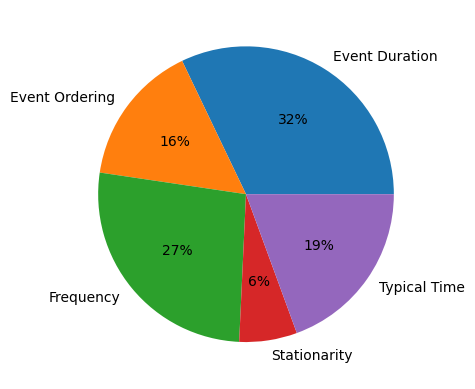

In [ ]:
#create pie chart
plt.pie(df.groupby(['type']).count()['context'].to_list(), labels = ['Event Duration','Event Ordering','Frequency','Stationarity','Typical Time'], autopct='%.0f%%')

In [ ]:
df.groupby('type')['context'].transform('nunique') #count(distinct)

0       314
1       314
2       314
3       314
4       314
       ... 
9437    314
9438    314
9439    314
9440    314
9441    189
Name: context, Length: 9442, dtype: int64

In [ ]:
df.drop_duplicates(subset=['type', 'context']).groupby('type').count()

context  question  candi  label  roberta_re  deberta_re  \
type                                                                      
Event Duration      314       314    314    314         314         314   
Event Ordering      263       263    263    263         263         263   
Frequency           300       300    300    300         300         300   
Stationarity        189       189    189    189         189         189   
Typical Time        266       266    266    266         266         266   

                bert_re  all  
type                          
Event Duration      314  314  
Event Ordering      263  263  
Frequency           300  300  
Stationarity        189  189  
Typical Time        266  266

([<matplotlib.patches.Wedge at 0x7f1398870370>,
 [Text(0.8118808997158965, 0.7421922962928859, 'Event Duration'),
  Text(-0.5567266129531085, 0.948712537299766, 'Event Ordering'),
  Text(-1.054775373895659, -0.3121680807245882, 'Frequency'),
  Text(-0.14229262327827208, -1.0907579059354042, 'Stationarity'),
  Text(0.8905282793117132, -0.6457239222346649, 'Typical Time')],
 [Text(0.44284412711776167, 0.4048321616143013, '24%'),
  Text(-0.30366906161078644, 0.5174795657998723, '20%'),
  Text(-0.5753320221249049, -0.1702734985770481, '23%'),
  Text(-0.07761415815178475, -0.5949588577829477, '14%'),
  Text(0.4857426978063889, -0.35221304849163537, '20%')])

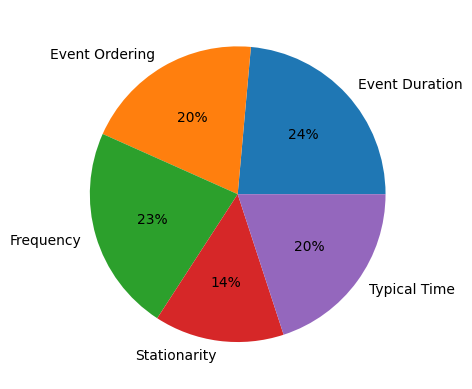

In [ ]:
#create pie chart
plt.pie(df.drop_duplicates(subset=['type', 'context']).groupby('type').count()['context'].to_list(), labels = ['Event Duration','Event Ordering','Frequency','Stationarity','Typical Time'], autopct='%.0f%%')

In [ ]:
mcr = df.groupby(['type', 'context']).sum()

<ipython-input-40-194f0c07e178>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mcr = df.groupby(['type', 'context']).sum()


In [ ]:
mcr.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 1332 entries, ('Event Duration', ', followed by other ports at Hyères, Antibes, and Nice.') to ('Typical Time', 'they were heard saying when the photo was taken -- while Rowlf is clearly a selfie king.')
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   roberta_re  1332 non-null   int64
 1   deberta_re  1332 non-null   int64
 2   bert_re     1332 non-null   int64
 3   all         1332 non-null   int64
dtypes: int64(4)
memory usage: 48.4+ KB


In [ ]:
mcr

roberta_re  \
type           context                                                          
Event Duration , followed by other ports at Hyères, Antibes, a...          14   
               , native Archaic Indians began to develop a las...          11   
               , these timid, gentle nomads hunting with bow a...           1   
               A floodplain is an area where a thick layer of ...           9   
               A statue, by James Earle Fraser, was dedicated ...           7   
...                                                                       ...   
Typical Time   You can clearly see the same rock layers on opp...          11   
               You can see examples of people with gravitation...           4   
               Zarco and Teixeira were appointed co-go­vern­or...           6   
               and jumped up and down on the side walk trying ...           7   
               they were heard saying when the photo was taken...           7   

                                                                   deberta_re  \
type           context                                                          
Event Duration , followed by other ports at Hyères, Antibes, a...          14   
               , native Archaic Indians began to develop a las...          14   
               , these timid, gentle nomads hunting with bow a...           1   
               A floodplain is an area where a thick layer of ...           8   
               A statue, by James Earle Fraser, was dedicated ...           9   
...                                                                       ...   
Typical Time   You can clearly see the same rock layers on opp...          13   
               You can see examples of people with gravitation...           4   
               Zarco and Teixeira were appointed co-go­vern­or...           6   
               and jumped up and down on the side walk trying ...           8   
               they were heard saying when the photo was taken...           6   

                                                                   bert_re  \
type           context                                                       
Event Duration , followed by other ports at Hyères, Antibes, a...       13   
               , native Archaic Indians began to develop a las...        5   
               , these timid, gentle nomads hunting with bow a...        1   
               A floodplain is an area where a thick layer of ...        9   
               A statue, by James Earle Fraser, was dedicated ...        9   
...                                                                    ...   
Typical Time   You can clearly see the same rock layers on opp...        9   
               You can see examples of people with gravitation...        3   
               Zarco and Teixeira were appointed co-go­vern­or...        5   
               and jumped up and down on the side walk trying ...        4   
               they were heard saying when the photo was taken...        7   

                                                                   all  
type           context                                                  
Event Duration , followed by other ports at Hyères, Antibes, a...   15  
               , native Archaic Indians began to develop a las...   14  
               , these timid, gentle nomads hunting with bow a...    1  
               A floodplain is an area where a thick layer of ...    9  
               A statue, by James Earle Fraser, was dedicated ...    9  
...                                                                ...  
Typical Time   You can clearly see the same rock layers on opp...   14  
               You can see examples of people with gravitation...    4  
               Zarco and Teixeira were appointed co-go­vern­or...    6  
               and jumped up and down on the side walk trying ...    8  
               they were heard saying when the photo was taken...   

In [ ]:
mcr['roberta_mc'] = np.where(mcr['all']==mcr['roberta_re'],1,0)
mcr['deberta_mc'] = np.where(mcr['all']==mcr['deberta_re'],1,0)
mcr['bert_mc'] = np.where(mcr['all']==mcr['bert_re'],1,0)

In [ ]:
mcr.index

MultiIndex([('Event Duration', ...),
            ('Event Duration', ...),
            ('Event Duration', ...),
            ('Event Duration', ...),
            ('Event Duration', ...),
            ('Event Duration', ...),
            ('Event Duration', ...),
            ('Event Duration', ...),
            ('Event Duration', ...),
            ('Event Duration', ...),
            ...
            (  'Typical Time', ...),
            (  'Typical Time', ...),
            (  'Typical Time', ...),
            (  'Typical Time', ...),
            (  'Typical Time', ...),
            (  'Typical Time', ...),
            (  'Typical Time', ...),
            (  'Typical Time', ...),
            (  'Typical Time', ...),
            (  'Typical Time', ...)],
           names=['type', 'context'], length=1332)

In [ ]:
mcr = mcr.reset_index()
mcr

type                                            context  \
0     Event Duration  , followed by other ports at Hyères, Antibes, ...   
1     Event Duration  , native Archaic Indians began to develop a la...   
2     Event Duration  , these timid, gentle nomads hunting with bow ...   
3     Event Duration  A floodplain is an area where a thick layer of...   
4     Event Duration  A statue, by James Earle Fraser, was dedicated...   
...              ...                                                ...   
1327    Typical Time  You can clearly see the same rock layers on op...   
1328    Typical Time  You can see examples of people with gravitatio...   
1329    Typical Time  Zarco and Teixeira were appointed co-go­vern­o...   
1330    Typical Time  and jumped up and down on the side walk trying...   
1331    Typical Time  they were heard saying when the photo was take...   

      roberta_re  deberta_re  bert_re  all  roberta_mc  deberta_mc  bert_mc  
0             14          14       13   15           0           0        0  
1             11          14        5   14           0           1        0  
2              1           1        1    1           1           1        1  
3              9           8        9    9           1           0        1  
4              7           9        9    9           0           1        1  
...          ...         ...      ...  ...         ...         ...      ...  
1327          11          13        9   14           0           0        0  
1328           4           4        3    4           1           1        0  
1329           6           6        5    6           1           1        0  
1330           7           8        4    8           0           1        0  
1331           7           6        7    7           1           0        1  

[1332 rows x 9 columns]

In [ ]:
mcr['all_mc'] = 1
mcr

type                                            context  \
0     Event Duration  , followed by other ports at Hyères, Antibes, ...   
1     Event Duration  , native Archaic Indians began to develop a la...   
2     Event Duration  , these timid, gentle nomads hunting with bow ...   
3     Event Duration  A floodplain is an area where a thick layer of...   
4     Event Duration  A statue, by James Earle Fraser, was dedicated...   
...              ...                                                ...   
1327    Typical Time  You can clearly see the same rock layers on op...   
1328    Typical Time  You can see examples of people with gravitatio...   
1329    Typical Time  Zarco and Teixeira were appointed co-go­vern­o...   
1330    Typical Time  and jumped up and down on the side walk trying...   
1331    Typical Time  they were heard saying when the photo was take...   

      roberta_re  deberta_re  bert_re  all  roberta_mc  deberta_mc  bert_mc  \
0             14          14       13   15           0           0        0   
1             11          14        5   14           0           1        0   
2              1           1        1    1           1           1        1   
3              9           8        9    9           1           0        1   
4              7           9        9    9           0           1        1   
...          ...         ...      ...  ...         ...         ...      ...   
1327          11          13        9   14           0           0        0   
1328           4           4        3    4           1           1        0   
1329           6           6        5    6           1           1        0   
1330           7           8        4    8           0           1        0   
1331           7           6        7    7           1           0        1   

      all_mc  
0          1  
1          1  
2          1  
3          1  
4          1  
...      ...  
1327       1  
1328       1  
1329       1  
1330       1  
1331       1  

[1332 rows x 10 columns]

In [ ]:
mcr.groupby('type').sum()

<ipython-input-47-ffec015ebc16>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mcr.groupby('type').sum()


roberta_re  deberta_re  bert_re   all  roberta_mc  deberta_mc  \
type                                                                            
Event Duration        2723        2785     2334  3032         158         180   
Event Ordering        1256        1312      931  1468         140         161   
Frequency             2200        2280     2031  2512         155         179   
Stationarity           468         491      412   597         109         131   
Typical Time          1597        1677     1333  1833         148         180   

                bert_mc  all_mc  
type                             
Event Duration       89     314  
Event Ordering       58     263  
Frequency           106     300  
Stationarity         91     189  
Typical Time         86     266

In [ ]:
data = mcr.groupby('type').sum().reset_index()
data

<ipython-input-54-7733ac95ca50>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data = mcr.groupby('type').sum().reset_index()


type  roberta_re  deberta_re  bert_re   all  roberta_mc  \
0  Event Duration        2723        2785     2334  3032         158   
1  Event Ordering        1256        1312      931  1468         140   
2       Frequency        2200        2280     2031  2512         155   
3    Stationarity         468         491      412   597         109   
4    Typical Time        1597        1677     1333  1833         148   

   deberta_mc  bert_mc  all_mc  
0         180       89     314  
1         161       58     263  
2         179      106     300  
3         131       91     189  
4         180       86     266